## Music to My Ears

# INDEX

### Section 1 : Introduction

### Section 2 : Detailed Description of the data set(s) and Data Extraction Technics
   
    2.1 -> Spotify DataSets
    2.2 -> Deezer Datasets

### Section 3 : Online music streaming platform comparison (Spotify and Deezer)
    
    3.1 -> Web Scraping for SPOTIFY Music streaming platform
            Section 3.1(A) -> Web Scraping of 2017, 2018 and 2019 datasets.
            Section 3.1(B) -> Data Extraction of the audio features of all tracks.
            Section 3.1(C) -> Data Cleaning of Spotify Datasets 
    3.2 -> Web Scraping for DEEZER Music streaming platform
            Section 3.2(A) -> Web Scraping for Artists' Datasets.
            Section 3.2(B) -> Data Extraction for all the tracks between 2017 & 2019.
            Section 3.2(C) -> Data Cleaning of Deezer Datasets
      
### Section 4 : Analysis and Visualizations based on comparison between Spotify & Deezer

    4.1 -> The Top 5 popular tracks on Spotify for year 2018 VS year 2019
    4.2 -> Compare songs on Spotify based on various parameters like energy
    4.3 -> Which parameters affect the popularity of the songs on the online music platforms?
    4.4 -> Execution of Linear Regression
    4.5 -> The top-5 artists from 2018 with the most increase rate in popularity in 2019 with respect to to 2018?
    4.6 -> The distribution of the spotify audience by countries
    4.7 -> The top 5 danceable tracks for the year 2018 VS 2019
    4.8 -> Comparing the platforms. Which are the top 5 artists for Spotify VS Deezer platforms?
    
### Section 5 : Conclusions drawn and Visualisations explained


# Section 1

## Introduction

As Plato aptly puts it, “Music gives a soul to the universe, wings to the mind, flight to the imagination and life to everything”. Inspired by this stunning literature and equipped with the power of Python, we will focus on the music streaming industry players for this project, including Spotify and Deezer. Within the last few years, the popularity of the music streaming platforms has gone through the roof and impacted the entire music industry massively. We will be primarily focusing on the trends in recent years for various songs, artists and playlists that have been streamed over these platforms. We will also focus on finding interesting relationships that can be leveraged by the artists creating the music and the way in which the current listeners consume music.

# Section 2

## Detailed Description of the data set(s) and Data Extraction Techniques

## Section 2.1

### Data Extraction via SPOTIFY music application

Primarily, we visited the https://developer.spotify.com/ website and created a developer's account in order to obtain access to the official spotify Web API. After executing the required python scripts, we initiated the project action plan. Initially, we recieved a unique client ID and client secret. Then we started exploring the nature of various syntaxes included in the Spotify Web API library. Extracting any specific artist's entire discography as well as extracting song data for every album released by the artist were the first few tasks which we performed on the system so as to get the gist of web scraping on this envrionment. This API also provides access to user related data, like playlists and music that the users save in their personal music library. The Spotify Web API is based on REST principles. Data resources are accessed via standard HTTPS requests in UTF-8 format to an API endpoint. Wherever possible, it uses appropriate HTTP verbs for each action. Following are some of the specific commands based on the spotify WEB API :

'METHOD' -> 'ACTION'

GET -> Retrieves resources,

POST -> Creates resourcesSpotify URI,

PUT -> Changes and/or replaces resources or collections,

DELETE -> Deletes resources

After understanding the complete functionality of specific commands, we started extracting data and converting them into dataframes for much better analysis and represention. We have defined a function named as "audio_features" which will return each and every technical detail related to the song quality for example it will return the aacousticness, song url, danceability, popularity, energy, instrumentalness, tempo etc. This function will also convert the extracted data into dataframes and will deliver a systematic table comprising of all the above mentioned measures.
Following are also other features of Spotify WEB API which came handy during our data wrangling :

1) Spotify URI - The resource identifier that you can enter, for example, in the Spotify Desktop client’s search box to locate an artist, album, or track.

2) Spotify ID - The base-62 identifier that you can find at the end of the Spotify URI (see above) for an artist, track, album, playlist, etc.

After the completion of the web scraping, data extraction and data cleaning we were able to obtain various types of clean music data based on the features like 'popularity', 'acousticness', 'speechiness' etc. The data we emphasised on was from the year 2017 to 2019. We were able to obtain raw data for a total of ten thousand (10,000) songs - for all three years - including all the other functionalities related to a particular song.

## Section 2.2

### Data Extraction via DEEZER music application

After accomplishing entensive data scraping for the Spotify music application, we were well versed with the data extraction process with the help of the WEB API package technique. Therefore, we were sure of obtaining another application for an unique data set so as to acquire full efficiency for comparitive study we aimed for, between two different music applications.
Similar to Spotify, we registered for the developer rights of the Deezer music application via https://developers.deezer.com/ and after recieving the unique client ID, we were able to scrape the raw music data from the Deezer database. As we discussed above that we were able to extract data for the years 2017 to 2019.

# Section 3

## Online music streaming platform comparison (Spotify and Deezer)

## Section 3.1

### Web Scraping for Spotify Music streaming platform

In [1]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials #To access authorised Spotify data
from IPython.display import display, HTML
import requests
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import urllib.request
from PIL import Image
from IPython.display import Image as im
import pandas as pd
import datetime
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [2]:
im(url = "https://upload.wikimedia.org/wikipedia/commons/5/56/Spotify_logo_horizontal_black.jpg")

## Section 3.1(A)

### Data Scraping for the years 2017, 2018 and 2019 via SPOTIPY API

In [3]:
#Getting the client id and client_secret for the spotipy object 
client_id = "8fa1f2d81a294a48a6f43c7eadf7a547"
client_secret = "9bc603b3e8554d22a66ad85723359623"
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager) #spotify object to access API

# create empty lists where the results are going to be stored
artist_name = []
track_name = []
popularity = []
track_id = []

artist_name1 = []
track_name1 = []
popularity1 = []
track_id1 = []

artist_name2 = []
track_name2 = []
popularity2 = []
track_id2 = []
#2018
for i in range(0,1000,50):
    track_results = sp.search(q='year:2018', type='track', limit=50,offset=i)
    for i, t in enumerate(track_results['tracks']['items']):
        artist_name.append(t['artists'][0]['name'])
        track_name.append(t['name'])
        track_id.append(t['id'])
        popularity.append(t['popularity'])
#2019
for i in range(0,1000,50):
    track_results1 = sp.search(q='year:2019', type='track', limit=50,offset=i)
    for i, t in enumerate(track_results1['tracks']['items']):
        artist_name1.append(t['artists'][0]['name'])
        track_name1.append(t['name'])
        track_id1.append(t['id'])
        popularity1.append(t['popularity'])
#2017
for i in range(0,1000,50):
    track_results2 = sp.search(q='year:2017', type='track', limit=50,offset=i)
    for i, t in enumerate(track_results2['tracks']['items']):
        artist_name2.append(t['artists'][0]['name'])
        track_name2.append(t['name'])
        track_id2.append(t['id'])
        popularity2.append(t['popularity'])
    #artist_top_tracks(artist_id, country='US')
print('Number of elements in the track_id list:', len(track_id))

Number of elements in the track_id list: 1000


In [4]:
print('Number of elements in the track_id list:', len(track_id1))

Number of elements in the track_id list: 1000


In [5]:
print('Number of elements in the track_id list:', len(track_id2))

Number of elements in the track_id list: 1000


In [6]:
#making the dataframes for the song tracks scraped for years 2017,2018 and 2019

df_tracks = pd.DataFrame({'artist_name':artist_name,'track_name':track_name,'track_id':track_id,'popularity':popularity})
df_tracks1 = pd.DataFrame({'artist_name':artist_name1,'track_name':track_name1,'track_id':track_id1,'popularity':popularity1})
df_tracks2 = pd.DataFrame({'artist_name':artist_name2,'track_name':track_name2,'track_id':track_id2,'popularity':popularity2})

In [7]:
#2018
df_tracks.head()

,artist_name,track_name,track_id,popularity
0,Trevor Daniel,Falling,4TnjEaWOeW0eKTKIEvJyCa,96
1,Juice WRLD,Lucid Dreams,285pBltuF7vW8TeWk8hdRR,89
2,Juice WRLD,All Girls Are The Same,4VXIryQMWpIdGgYR4TrjT1,84
3,Billie Eilish,lovely (with Khalid),0u2P5u6lvoDfwTYjAADbn4,90
4,Post Malone,Sunflower - Spider-Man: Into the Spider-Verse,3KkXRkHbMCARz0aVfEt68P,86


In [8]:
#2019
df_tracks1.head()

,artist_name,track_name,track_id,popularity
0,Roddy Ricch,The Box,0nbXyq5TXYPCO7pr3N8S4I,99
1,The Weeknd,Blinding Lights,0sf12qNH5qcw8qpgymFOqD,100
2,Doja Cat,Say So,3Dv1eDb0MEgF93GpLXlucZ,96
3,Arizona Zervas,ROXANNE,696DnlkuDOXcMAnKlTgXXK,96
4,Dua Lipa,Don't Start Now,6WrI0LAC5M1Rw2MnX2ZvEg,98


In [9]:
#2017
df_tracks2.sort_values(["popularity"],ascending=False).head()

,artist_name,track_name,track_id,popularity
0,XXXTENTACION,Jocelyn Flores,7m9OqQk4RVRkw9JJdeAw96,87
21,Imagine Dragons,Believer,0pqnGHJpmpxLKifKRmU6WP,87
24,Ed Sheeran,Perfect,0tgVpDi06FyKpA1z0VMD4v,86
12,Billie Eilish,ocean eyes,7hDVYcQq6MxkdJGweuCtl9,85
57,Ed Sheeran,Shape of You,7qiZfU4dY1lWllzX7mPBI3,85


In [10]:
grouped = df_tracks.groupby(['artist_name','track_name'], as_index=True).size()
grouped[grouped > 1].count()

19

In [11]:
grouped1 = df_tracks1.groupby(['artist_name','track_name'], as_index=True).size()
grouped1[grouped1 > 1].count()

39

In [12]:
grouped2 = df_tracks2.groupby(['artist_name','track_name'], as_index=True).size()
grouped2[grouped2 > 1].count()

23

In [13]:
df_tracks.drop_duplicates(subset=['artist_name','track_name'], inplace=True)
df_tracks.shape

(981, 4)

In [14]:
df_tracks1.drop_duplicates(subset=['artist_name','track_name'], inplace=True)
df_tracks1.shape

(960, 4)

In [15]:
df_tracks2.drop_duplicates(subset=['artist_name','track_name'], inplace=True)
df_tracks2.shape

(977, 4)

## Section 3.1(B)

### Scraping the audio features of the tracks for all 2017 to 2019 in SPOTIFY

In [16]:
#scraping the audio features for 2018
rows = []
batchsize = 100

for i in range(0,len(df_tracks['track_id']),batchsize):
    batch = df_tracks['track_id'][i:i+batchsize]
    feature_results = sp.audio_features(batch)
    for i, t in enumerate(feature_results):
        rows.append(t)

print('Number of elements in the track_id list:', len(rows))

Number of elements in the track_id list: 981


In [17]:
#scraping the audio features for 2019
rows1 = []
batchsize = 100

for j in range(0,len(df_tracks1['track_id']),batchsize):
    batch1 = df_tracks1['track_id'][j:j+batchsize]
    feature_results1 = sp.audio_features(batch1)
    for j, k in enumerate(feature_results1):
        rows1.append(k)

print('Number of elements in the track_id list:', len(rows1))

Number of elements in the track_id list: 960


In [18]:
#scraping the audio features for 2017
rows2 = []
batchsize = 100

for i in range(0,len(df_tracks2['track_id']),batchsize):
    batch2 = df_tracks2['track_id'][i:i+batchsize]
    feature_results2 = sp.audio_features(batch2)
    for i, t in enumerate(feature_results2):
        rows2.append(t)

print('Number of elements in the track_id list:', len(rows2))

Number of elements in the track_id list: 977


In [19]:
# empty list, batchsize and the counter for None results
rows1 = []
batchsize = 100
None_counter = 0

for i in range(0,len(df_tracks1['track_id']),batchsize):
    batch1 = df_tracks1['track_id'][i:i+batchsize]
    feature_results1 = sp.audio_features(batch1)
    for i, t in enumerate(feature_results1):
        if t == None:
            None_counter = None_counter + 1
        else:
            rows1.append(t)
            
print('Number of tracks with no audio features:', None_counter)

Number of tracks with no audio features: 0


In [20]:
df_audio_features = pd.DataFrame.from_dict(rows,orient='columns')
print("Shape of the dataset:", df_audio_features.shape)
df_audio_features.head()

Shape of the dataset: (981, 18)


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.784,0.430,10,-8.756,0,0.0364,0.1230,0.000000,0.0887,0.236,127.087,audio_features,4TnjEaWOeW0eKTKIEvJyCa,spotify:track:4TnjEaWOeW0eKTKIEvJyCa,https://api.spotify.com/v1/tracks/4TnjEaWOeW0e...,https://api.spotify.com/v1/audio-analysis/4Tnj...,159382,4
1,0.511,0.566,6,-7.230,0,0.2000,0.3490,0.000000,0.3400,0.218,83.903,audio_features,285pBltuF7vW8TeWk8hdRR,spotify:track:285pBltuF7vW8TeWk8hdRR,https://api.spotify.com/v1/tracks/285pBltuF7vW...,https://api.spotify.com/v1/audio-analysis/285p...,239836,4
2,0.671,0.529,0,-7.226,1,0.3070,0.0769,0.000335,0.0856,0.203,161.989,audio_features,4VXIryQMWpIdGgYR4TrjT1,spotify:track:4VXIryQMWpIdGgYR4TrjT1,https://api.spotify.com/v1/tracks/4VXIryQMWpId...,https://api.spotify.com/v1/audio-analysis/4VXI...,165820,4
3,0.351,0.296,4,-10.109,0,0.0333,0.9340,0.000000,0.0950,0.120,115.284,audio_features,0u2P5u6lvoDfwTYjAADbn4,spotify:track:0u2P5u6lvoDfwTYjAADbn4,https://api.spotify.com/v1/tracks/0u2P5u6lvoDf...,https://api.spotify.com/v1/audio-analysis/0u2P...,200186,4
4,0.760,0.479,2,-5.574,1,0.0466,0.5560,0.000000,0.0703,0.913,89.911,audio_features,3KkXRkHbMCARz0aVfEt68P,spotify:track:3KkXRkHbMCARz0aVfEt68P,https://api.spotify.com/v1/tracks/3KkXRkHbMCAR...,https://api.spotify.com/v1/audio-analysis/3KkX...,158040,4


In [21]:
df_audio_features1 = pd.DataFrame.from_dict(rows1, orient='columns')

In [22]:
print("Shape of the dataset:", df_audio_features1.shape)
df_audio_features1.head()

Shape of the dataset: (960, 18)


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.896,0.586,10,-6.687,0,0.0559,0.10400,0.000000,0.7900,0.642,116.971,audio_features,0nbXyq5TXYPCO7pr3N8S4I,spotify:track:0nbXyq5TXYPCO7pr3N8S4I,https://api.spotify.com/v1/tracks/0nbXyq5TXYPC...,https://api.spotify.com/v1/audio-analysis/0nbX...,196653,4
1,0.513,0.796,1,-4.075,1,0.0629,0.00147,0.000209,0.0938,0.345,171.017,audio_features,0sf12qNH5qcw8qpgymFOqD,spotify:track:0sf12qNH5qcw8qpgymFOqD,https://api.spotify.com/v1/tracks/0sf12qNH5qcw...,https://api.spotify.com/v1/audio-analysis/0sf1...,201573,4
2,0.787,0.673,11,-4.577,0,0.1580,0.25600,0.000004,0.0904,0.786,110.962,audio_features,3Dv1eDb0MEgF93GpLXlucZ,spotify:track:3Dv1eDb0MEgF93GpLXlucZ,https://api.spotify.com/v1/tracks/3Dv1eDb0MEgF...,https://api.spotify.com/v1/audio-analysis/3Dv1...,237893,4
3,0.621,0.601,6,-5.616,0,0.1480,0.05220,0.000000,0.4600,0.457,116.735,audio_features,696DnlkuDOXcMAnKlTgXXK,spotify:track:696DnlkuDOXcMAnKlTgXXK,https://api.spotify.com/v1/tracks/696DnlkuDOXc...,https://api.spotify.com/v1/audio-analysis/696D...,163636,5
4,0.794,0.793,11,-4.521,0,0.0842,0.01250,0.000000,0.0952,0.677,123.941,audio_features,6WrI0LAC5M1Rw2MnX2ZvEg,spotify:track:6WrI0LAC5M1Rw2MnX2ZvEg,https://api.spotify.com/v1/tracks/6WrI0LAC5M1R...,https://api.spotify.com/v1/audio-analysis/6WrI...,183290,4


In [23]:
# empty list, batchsize and the counter for None results
rows2 = []
batchsize = 100
None_counter = 0

for i in range(0,len(df_tracks2['track_id']),batchsize):
    batch2 = df_tracks2['track_id'][i:i+batchsize]
    feature_results2 = sp.audio_features(batch2)
    for i, t in enumerate(feature_results2):
        if t == None:
            None_counter = None_counter + 1
        else:
            rows2.append(t)
            
print('Number of tracks where no audio features were available:',None_counter)

Number of tracks where no audio features were available: 0


In [24]:
df_audio_features2 = pd.DataFrame.from_dict(rows2,orient='columns')
print("Shape of the dataset:", df_audio_features2.shape)
df_audio_features2.head()

Shape of the dataset: (977, 18)


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.872,0.39100,0,-9.144,0,0.2420,0.46900,0.000004,0.297,0.437,134.021,audio_features,7m9OqQk4RVRkw9JJdeAw96,spotify:track:7m9OqQk4RVRkw9JJdeAw96,https://api.spotify.com/v1/tracks/7m9OqQk4RVRk...,https://api.spotify.com/v1/audio-analysis/7m9O...,119133,4
1,0.732,0.75000,11,-6.366,0,0.2310,0.00264,0.000000,0.109,0.401,155.096,audio_features,7GX5flRQZVHRAGd6B4TmDO,spotify:track:7GX5flRQZVHRAGd6B4TmDO,https://api.spotify.com/v1/tracks/7GX5flRQZVHR...,https://api.spotify.com/v1/audio-analysis/7GX5...,182707,4
2,0.797,0.53300,0,-9.740,0,0.0412,0.01720,0.000152,0.103,0.329,131.036,audio_features,7AQim7LbvFVZJE3O8TYgf2,spotify:track:7AQim7LbvFVZJE3O8TYgf2,https://api.spotify.com/v1/tracks/7AQim7LbvFVZ...,https://api.spotify.com/v1/audio-analysis/7AQi...,146520,4
3,0.000,0.00005,10,-32.354,0,0.0000,0.92300,0.297000,0.110,0.000,0.000,audio_features,65rkHetZXO6DQmBh3C2YtW,spotify:track:65rkHetZXO6DQmBh3C2YtW,https://api.spotify.com/v1/tracks/65rkHetZXO6D...,https://api.spotify.com/v1/audio-analysis/65rk...,147097,0
4,0.000,0.00002,2,-40.449,0,0.0000,0.94400,0.869000,0.112,0.000,0.000,audio_features,6H4B9gJD6eQlNoEh8q85pP,spotify:track:6H4B9gJD6eQlNoEh8q85pP,https://api.spotify.com/v1/tracks/6H4B9gJD6eQl...,https://api.spotify.com/v1/audio-analysis/6H4B...,135484,0


## Section 3.1(C)

### Data Cleaning of Spotify Datasets

In [25]:
#dropping unnecessary columns
columns_to_drop = ['analysis_url','track_href','type','uri']
df_audio_features.drop(columns_to_drop, axis=1,inplace=True)
df_audio_features.rename(columns={'id': 'track_id'}, inplace=True)
df_audio_features.shape

(981, 14)

In [26]:
#merging both dataframes
df = pd.merge(df_tracks,df_audio_features,on='track_id',how='inner')
print("Shape of the dataset:", df_audio_features.shape)

Shape of the dataset: (981, 14)


In [27]:
columns_to_drop = ['analysis_url','track_href','type','uri']
df_audio_features1.drop(columns_to_drop, axis=1,inplace=True)
df_audio_features1.rename(columns={'id': 'track_id'}, inplace=True)
df_audio_features1.shape

(960, 14)

In [28]:
#merging both dataframes of tracks and audio features for spotify 
df1 = pd.merge(df_tracks1,df_audio_features1,on='track_id',how='inner')
print("Shape of the dataset:", df_audio_features1.shape)

Shape of the dataset: (960, 14)


In [29]:
#dropping unnecessary columns
columns_to_drop = ['analysis_url','track_href','type','uri']
df_audio_features2.drop(columns_to_drop, axis=1,inplace=True)
df_audio_features2.rename(columns={'id': 'track_id'}, inplace=True)
df_audio_features2.shape

(977, 14)

In [30]:
#merging both dataframes
df2 = pd.merge(df_tracks2,df_audio_features2,on='track_id',how='inner')
print("Shape of the dataset:", df_audio_features2.shape)

Shape of the dataset: (977, 14)


In [31]:
#final dataset for 2018
df = df.sort_values('popularity', ascending=False)
display(HTML(df.head().to_html(index=False)))

artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
Trevor Daniel,Falling,4TnjEaWOeW0eKTKIEvJyCa,96,0.784,0.430,10,-8.756,0,0.0364,0.123,0.00000,0.0887,0.2360,127.087,159382,4
Billie Eilish,lovely (with Khalid),0u2P5u6lvoDfwTYjAADbn4,90,0.351,0.296,4,-10.109,0,0.0333,0.934,0.00000,0.0950,0.1200,115.284,200186,4
Juice WRLD,Lucid Dreams,285pBltuF7vW8TeWk8hdRR,89,0.511,0.566,6,-7.230,0,0.2000,0.349,0.00000,0.3400,0.2180,83.903,239836,4
Post Malone,rockstar (feat. 21 Savage),0e7ipj03S05BNilyu5bRzt,87,0.585,0.520,5,-6.136,0,0.0712,0.124,0.00007,0.1310,0.1290,159.801,218147,4
Kina,Get You The Moon (feat. Snøw),4ZLzoOkj0MPWrTLvooIuaa,87,0.498,0.235,1,-16.541,0,0.1880,0.720,0.00000,0.1440,0.0895,118.917,179080,4


In [32]:
#final dataset for 2019
df1 = df1.sort_values('popularity', ascending=False)
display(HTML(df1.head().to_html(index=False)))

artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
The Weeknd,Blinding Lights,0sf12qNH5qcw8qpgymFOqD,100,0.513,0.796,1,-4.075,1,0.0629,0.00147,0.000209,0.0938,0.345,171.017,201573,4
Roddy Ricch,The Box,0nbXyq5TXYPCO7pr3N8S4I,99,0.896,0.586,10,-6.687,0,0.0559,0.10400,0.000000,0.7900,0.642,116.971,196653,4
Dua Lipa,Don't Start Now,6WrI0LAC5M1Rw2MnX2ZvEg,98,0.794,0.793,11,-4.521,0,0.0842,0.01250,0.000000,0.0952,0.677,123.941,183290,4
Tones And I,Dance Monkey,2XU0oxnq2qxCpomAAuJY8K,97,0.824,0.588,6,-6.400,0,0.0924,0.69200,0.000104,0.1490,0.513,98.027,209438,4
Doja Cat,Say So,3Dv1eDb0MEgF93GpLXlucZ,96,0.787,0.673,11,-4.577,0,0.1580,0.25600,0.000004,0.0904,0.786,110.962,237893,4


In [33]:
#final dataset for 2017
df2 = df2.sort_values('popularity', ascending=False)
display(HTML(df2.head().to_html(index=False)))

artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
XXXTENTACION,Jocelyn Flores,7m9OqQk4RVRkw9JJdeAw96,87,0.872,0.39100,0,-9.144,0,0.2420,0.46900,0.000004,0.297,0.437,134.021,119133,4
Imagine Dragons,Believer,0pqnGHJpmpxLKifKRmU6WP,87,0.776,0.78000,10,-4.374,0,0.1280,0.06220,0.000000,0.081,0.666,124.949,204347,4
Ed Sheeran,Perfect,0tgVpDi06FyKpA1z0VMD4v,86,0.599,0.44800,8,-6.312,1,0.0232,0.16300,0.000000,0.106,0.168,95.050,263400,3
Lil Uzi Vert,XO Tour Llif3,7GX5flRQZVHRAGd6B4TmDO,85,0.732,0.75000,11,-6.366,0,0.2310,0.00264,0.000000,0.109,0.401,155.096,182707,4
Erik Eriksson,Clean White Noise - Loopable with no fade,2bRKxuH1o7pTmb1y4GfdEc,85,0.000,0.00342,8,-28.460,1,0.0000,0.79100,1.000000,0.111,0.000,0.000,90228,0


## Section 3.2

### Web Scraping for Deezer music streaming platform

In [34]:
im(url = "https://cdn.mos.cms.futurecdn.net/c6d31f92c1cb0f331bc2f0eae47187a5-970-80.jpg", width = 1000)

In [35]:
#Getting the Deezer Id to initiate scraping from the platform
deezer_id = 3219012724

In [36]:
url = "https://api.deezer.com/user/{deezer_id}"
user_response = requests.get(url)
#user_response.content

## Section 3.2 (A)

### Data Extraction for Artists

In [37]:
artists_url = f"https://api.deezer.com/user/{deezer_id}/artists"
artists_response = requests.get(artists_url)
#artists_response.json()

In [38]:
artists = []  # we will store artists here
all_artists_loaded = False # in the beginning nothing is loaded
url = f"https://api.deezer.com/user/{deezer_id}/artists"

while not all_artists_loaded:
    response = requests.get(url).json()
    artists += response['data']   # data attribute contains artists
    if response.get('next'):      # there are more artists on the next page
        url = response['next']   
    else:                         # if there are no more followed artists
        all_artists_loaded = True

In [39]:
#artists

In [40]:
releases = [] # we'll store all releases here

for artist in artists:
    # the old algorithm is still working here
    all_releases_loaded = False
    artist_id = artist['id']
    url = f"https://api.deezer.com/artist/{artist_id}/albums"

    while not all_releases_loaded:
        response = requests.get(url).json()
        releases += response['data']
        if response.get('next'):
            url = response['next']
        else:
            all_releases_loaded = True

In [41]:
#releases

In [42]:
today = datetime.date.today()
oneyearago=today-datetime.timedelta(days=365)
twoyear_ago = oneyearago - datetime.timedelta(days=365)
threeyear_ago = twoyear_ago - datetime.timedelta(days=365)
#print(oneyearago)

In [43]:
releases = [] # we'll store all releases here

for artist in artists:
    # this time we'll store releases in a temporary array
    current_artist_releases = []

    # nothing changed here
    all_releases_loaded = False
    artist_id = artist['id']
    url = f"https://api.deezer.com/artist/{artist_id}/albums"

    while not all_releases_loaded:
        response = requests.get(url).json()

        # now we're saving each page's response to current_artists_releases
        # instead of straight to releases
        current_artist_releases += response['data']
        
        # this stays the same too
        if response.get('next'):
            url = response['next']
        else:
            all_releases_loaded = True
            
    # and after we've fetched all releases
    # we can add full title to all of them
    for release in current_artist_releases:
        full_title = f"{artist['name']} — {release['title']}"
        release['full_title'] = full_title
        
    # and only after we every release from current artist
    # has a full title we can add them to the main releases
    releases += current_artist_releases

## Section 3.2 (B)

### Data Extraction for 2017, 2018 and 2019 datasets for all the released tracks

In [44]:
#Getting the releases for the last 3 years- 2017,2018,2019.

latest_releases1 = [
    release for release in releases
    if release['release_date'] > str(oneyearago)
]
latest_releases2 = [
    release for release in releases
    if release['release_date'] > str(twoyear_ago)
]

latest_releases3 = [
    release for release in releases
    if release['release_date'] > str(threeyear_ago)
]

In [45]:
# latest_releases
# Creating a dataframe object from listoftuples for all 3 years
Release_latest1 = pd.DataFrame(latest_releases1)
Release_latest2 = pd.DataFrame(latest_releases2) 
Release_latest3 = pd.DataFrame(latest_releases3) 
# Release_latest1

In [46]:
Release_latest1.head()

,id,title,link,cover,cover_small,cover_medium,cover_big,cover_xl,genre_id,fans,release_date,record_type,tracklist,explicit_lyrics,type,full_title
0,118255982,Courage (Deluxe Edition),https://www.deezer.com/album/118255982,https://api.deezer.com/album/118255982/image,https://e-cdns-images.dzcdn.net/images/cover/0...,https://e-cdns-images.dzcdn.net/images/cover/0...,https://e-cdns-images.dzcdn.net/images/cover/0...,https://e-cdns-images.dzcdn.net/images/cover/0...,132,17989,2019-11-15,album,https://api.deezer.com/album/118255982/tracks,True,album,Céline Dion — Courage (Deluxe Edition)
1,125176162,Soul (Japanese Bonus Track),https://www.deezer.com/album/125176162,https://api.deezer.com/album/125176162/image,https://e-cdns-images.dzcdn.net/images/cover/5...,https://e-cdns-images.dzcdn.net/images/cover/5...,https://e-cdns-images.dzcdn.net/images/cover/5...,https://e-cdns-images.dzcdn.net/images/cover/5...,132,152,2019-11-14,single,https://api.deezer.com/album/125176162/tracks,False,album,Céline Dion — Soul (Japanese Bonus Track)
2,113300682,Flying On My Own (Dave Audé Remix),https://www.deezer.com/album/113300682,https://api.deezer.com/album/113300682/image,https://e-cdns-images.dzcdn.net/images/cover/2...,https://e-cdns-images.dzcdn.net/images/cover/2...,https://e-cdns-images.dzcdn.net/images/cover/2...,https://e-cdns-images.dzcdn.net/images/cover/2...,132,932,2019-09-27,single,https://api.deezer.com/album/113300682/tracks,False,album,Céline Dion — Flying On My Own (Dave Audé Remix)
3,111498922,Imperfections,https://www.deezer.com/album/111498922,https://api.deezer.com/album/111498922/image,https://e-cdns-images.dzcdn.net/images/cover/1...,https://e-cdns-images.dzcdn.net/images/cover/1...,https://e-cdns-images.dzcdn.net/images/cover/1...,https://e-cdns-images.dzcdn.net/images/cover/1...,132,3075,2019-09-18,single,https://api.deezer.com/album/111498922/tracks,False,album,Céline Dion — Imperfections
4,111498942,Courage,https://www.deezer.com/album/111498942,https://api.deezer.com/album/111498942/image,https://e-cdns-images.dzcdn.net/images/cover/1...,https://e-cdns-images.dzcdn.net/images/cover/1...,https://e-cdns-images.dzcdn.net/images/cover/1...,https://e-cdns-images.dzcdn.net/images/cover/1...,132,3810,2019-09-18,single,https://api.deezer.com/album/111498942/tracks,False,album,Céline Dion — Courage


In [47]:
Release_latest2.head()

,id,title,link,cover,cover_small,cover_medium,cover_big,cover_xl,genre_id,fans,release_date,record_type,tracklist,explicit_lyrics,type,full_title
0,118255982,Courage (Deluxe Edition),https://www.deezer.com/album/118255982,https://api.deezer.com/album/118255982/image,https://e-cdns-images.dzcdn.net/images/cover/0...,https://e-cdns-images.dzcdn.net/images/cover/0...,https://e-cdns-images.dzcdn.net/images/cover/0...,https://e-cdns-images.dzcdn.net/images/cover/0...,132,17989,2019-11-15,album,https://api.deezer.com/album/118255982/tracks,True,album,Céline Dion — Courage (Deluxe Edition)
1,84830532,All the Way...A Decade of Song,https://www.deezer.com/album/84830532,https://api.deezer.com/album/84830532/image,https://e-cdns-images.dzcdn.net/images/cover/9...,https://e-cdns-images.dzcdn.net/images/cover/9...,https://e-cdns-images.dzcdn.net/images/cover/9...,https://e-cdns-images.dzcdn.net/images/cover/9...,132,4745,2019-01-18,album,https://api.deezer.com/album/84830532/tracks,False,album,Céline Dion — All the Way...A Decade of Song
2,84838432,These Are Special Times,https://www.deezer.com/album/84838432,https://api.deezer.com/album/84838432/image,https://e-cdns-images.dzcdn.net/images/cover/a...,https://e-cdns-images.dzcdn.net/images/cover/a...,https://e-cdns-images.dzcdn.net/images/cover/a...,https://e-cdns-images.dzcdn.net/images/cover/a...,132,4819,2019-01-18,album,https://api.deezer.com/album/84838432/tracks,False,album,Céline Dion — These Are Special Times
3,84838542,The Very Best of Celine Dion,https://www.deezer.com/album/84838542,https://api.deezer.com/album/84838542/image,https://e-cdns-images.dzcdn.net/images/cover/0...,https://e-cdns-images.dzcdn.net/images/cover/0...,https://e-cdns-images.dzcdn.net/images/cover/0...,https://e-cdns-images.dzcdn.net/images/cover/0...,132,12934,2019-01-18,album,https://api.deezer.com/album/84838542/tracks,False,album,Céline Dion — The Very Best of Celine Dion
4,85033442,My Love Ultimate Essential Collection,https://www.deezer.com/album/85033442,https://api.deezer.com/album/85033442/image,https://e-cdns-images.dzcdn.net/images/cover/5...,https://e-cdns-images.dzcdn.net/images/cover/5...,https://e-cdns-images.dzcdn.net/images/cover/5...,https://e-cdns-images.dzcdn.net/images/cover/5...,132,8111,2019-01-18,album,https://api.deezer.com/album/85033442/tracks,False,album,Céline Dion — My Love Ultimate Essential Colle...


In [48]:
Release_latest3.head()

,id,title,link,cover,cover_small,cover_medium,cover_big,cover_xl,genre_id,fans,release_date,record_type,tracklist,explicit_lyrics,type,full_title
0,118255982,Courage (Deluxe Edition),https://www.deezer.com/album/118255982,https://api.deezer.com/album/118255982/image,https://e-cdns-images.dzcdn.net/images/cover/0...,https://e-cdns-images.dzcdn.net/images/cover/0...,https://e-cdns-images.dzcdn.net/images/cover/0...,https://e-cdns-images.dzcdn.net/images/cover/0...,132,17989,2019-11-15,album,https://api.deezer.com/album/118255982/tracks,True,album,Céline Dion — Courage (Deluxe Edition)
1,84830532,All the Way...A Decade of Song,https://www.deezer.com/album/84830532,https://api.deezer.com/album/84830532/image,https://e-cdns-images.dzcdn.net/images/cover/9...,https://e-cdns-images.dzcdn.net/images/cover/9...,https://e-cdns-images.dzcdn.net/images/cover/9...,https://e-cdns-images.dzcdn.net/images/cover/9...,132,4745,2019-01-18,album,https://api.deezer.com/album/84830532/tracks,False,album,Céline Dion — All the Way...A Decade of Song
2,84838432,These Are Special Times,https://www.deezer.com/album/84838432,https://api.deezer.com/album/84838432/image,https://e-cdns-images.dzcdn.net/images/cover/a...,https://e-cdns-images.dzcdn.net/images/cover/a...,https://e-cdns-images.dzcdn.net/images/cover/a...,https://e-cdns-images.dzcdn.net/images/cover/a...,132,4819,2019-01-18,album,https://api.deezer.com/album/84838432/tracks,False,album,Céline Dion — These Are Special Times
3,84838542,The Very Best of Celine Dion,https://www.deezer.com/album/84838542,https://api.deezer.com/album/84838542/image,https://e-cdns-images.dzcdn.net/images/cover/0...,https://e-cdns-images.dzcdn.net/images/cover/0...,https://e-cdns-images.dzcdn.net/images/cover/0...,https://e-cdns-images.dzcdn.net/images/cover/0...,132,12934,2019-01-18,album,https://api.deezer.com/album/84838542/tracks,False,album,Céline Dion — The Very Best of Celine Dion
4,85033442,My Love Ultimate Essential Collection,https://www.deezer.com/album/85033442,https://api.deezer.com/album/85033442/image,https://e-cdns-images.dzcdn.net/images/cover/5...,https://e-cdns-images.dzcdn.net/images/cover/5...,https://e-cdns-images.dzcdn.net/images/cover/5...,https://e-cdns-images.dzcdn.net/images/cover/5...,132,8111,2019-01-18,album,https://api.deezer.com/album/85033442/tracks,False,album,Céline Dion — My Love Ultimate Essential Colle...


In [49]:
#sorting the releases according to the release date
latest_releases = sorted(latest_releases1, key=lambda release: release['release_date'])
for release in latest_releases:
    date = release['release_date']
    title = release['title']
    print(f"{date}: {title}")

2019-04-12: Mañana Es Too Late
2019-04-12: Roll The Dice
2019-04-19: Contra La Pared (Dom Da Bomb Remix)
2019-04-25: Baila Baila Baila (Remix) [feat. Farruko, Anuel Aa]
2019-04-25: Light It Up
2019-05-03: Contra La Pared (Rynx Remix)
2019-05-16: Ven y Hazlo Tú
2019-05-17: Contra La Pared (The FaNaTiX Remix)
2019-05-17: Contra La Pared (Banx & Ranx Remix)
2019-05-17: No Me Conoce (Remix)
2019-05-31: Contra La Pared (Instrumental)
2019-06-05: Haute (feat. J Balvin & Chris Brown)
2019-06-09: Flying On My Own (Live from Las Vegas)
2019-06-14: Rescue Me (feat. A Day To Remember)
2019-06-17: Contra La Pared (Remixes)
2019-06-21: One Thing Right
2019-06-28: Flying On My Own + Dave Audé Remix
2019-06-28: OASIS
2019-06-28: Room to Fall
2019-07-03: Joytime III
2019-07-05: Goodbyes
2019-08-09: Loco Contigo (Cedric Gervais Remix)
2019-08-09: One Thing Right (Remixes)
2019-08-23: Indeciso
2019-08-30: Circles
2019-09-06: Carry Me Away
2019-09-06: Hollywood's Bleeding
2019-09-13: YOSHI (prod. Strage 

## Section 3.2 (C)

### Data Cleaning of Deezer Datasets

In [50]:
#splitting the full_title into artist name and title columns in the dataframes and deleting the full title column
Release_latest1[['Artist name',"Title1"]] = Release_latest1['full_title'].str.split('—', expand=True)
del Release_latest1['full_title']

In [51]:
Release_latest2[['Artist name',"Title1"]] = Release_latest2['full_title'].str.split('—', expand=True)
del Release_latest2['full_title']

In [52]:
Release_latest3[['Artist name',"Title1"]] = Release_latest3['full_title'].str.split('—', expand=True)
del Release_latest3['full_title']

In [53]:
Release_latest1.head()

,id,title,link,cover,cover_small,cover_medium,cover_big,cover_xl,genre_id,fans,release_date,record_type,tracklist,explicit_lyrics,type,Artist name,Title1
0,118255982,Courage (Deluxe Edition),https://www.deezer.com/album/118255982,https://api.deezer.com/album/118255982/image,https://e-cdns-images.dzcdn.net/images/cover/0...,https://e-cdns-images.dzcdn.net/images/cover/0...,https://e-cdns-images.dzcdn.net/images/cover/0...,https://e-cdns-images.dzcdn.net/images/cover/0...,132,17989,2019-11-15,album,https://api.deezer.com/album/118255982/tracks,True,album,Céline Dion,Courage (Deluxe Edition)
1,125176162,Soul (Japanese Bonus Track),https://www.deezer.com/album/125176162,https://api.deezer.com/album/125176162/image,https://e-cdns-images.dzcdn.net/images/cover/5...,https://e-cdns-images.dzcdn.net/images/cover/5...,https://e-cdns-images.dzcdn.net/images/cover/5...,https://e-cdns-images.dzcdn.net/images/cover/5...,132,152,2019-11-14,single,https://api.deezer.com/album/125176162/tracks,False,album,Céline Dion,Soul (Japanese Bonus Track)
2,113300682,Flying On My Own (Dave Audé Remix),https://www.deezer.com/album/113300682,https://api.deezer.com/album/113300682/image,https://e-cdns-images.dzcdn.net/images/cover/2...,https://e-cdns-images.dzcdn.net/images/cover/2...,https://e-cdns-images.dzcdn.net/images/cover/2...,https://e-cdns-images.dzcdn.net/images/cover/2...,132,932,2019-09-27,single,https://api.deezer.com/album/113300682/tracks,False,album,Céline Dion,Flying On My Own (Dave Audé Remix)
3,111498922,Imperfections,https://www.deezer.com/album/111498922,https://api.deezer.com/album/111498922/image,https://e-cdns-images.dzcdn.net/images/cover/1...,https://e-cdns-images.dzcdn.net/images/cover/1...,https://e-cdns-images.dzcdn.net/images/cover/1...,https://e-cdns-images.dzcdn.net/images/cover/1...,132,3075,2019-09-18,single,https://api.deezer.com/album/111498922/tracks,False,album,Céline Dion,Imperfections
4,111498942,Courage,https://www.deezer.com/album/111498942,https://api.deezer.com/album/111498942/image,https://e-cdns-images.dzcdn.net/images/cover/1...,https://e-cdns-images.dzcdn.net/images/cover/1...,https://e-cdns-images.dzcdn.net/images/cover/1...,https://e-cdns-images.dzcdn.net/images/cover/1...,132,3810,2019-09-18,single,https://api.deezer.com/album/111498942/tracks,False,album,Céline Dion,Courage


In [54]:
#Top artists according to the popularity(fans)

R1=Release_latest1.sort_values(by ='fans',ascending=False )
R1["Artist name"].head(10)

44     Post Malone 
21        J Balvin 
20        J Balvin 
15    Selena Gomez 
38        J Balvin 
46     Post Malone 
14        Maroon 5 
0      Céline Dion 
49      Marshmello 
41        J Balvin 
Name: Artist name, dtype: object

# Section 4

## Analysis and Visualizations based on comparison between Spotify & Deezer

In [55]:
im(url = "https://www.audfree.com/images/resource/deezer-vs-spotify.jpg", width = 1000)

## Section 4.1

### Analysis : The Top 5 popular tracks on Spotify for year 2018 VS year 2019

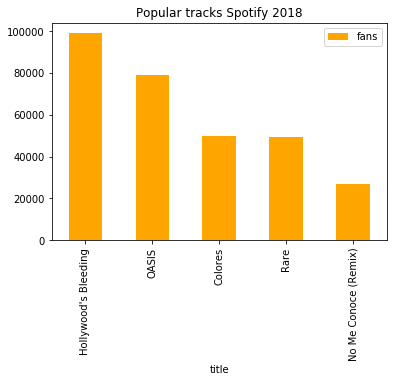

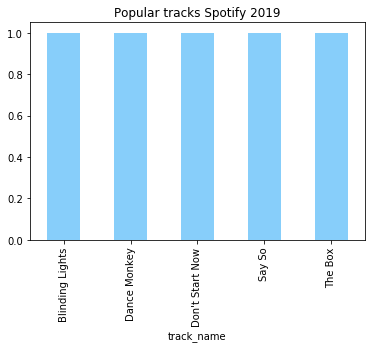

In [56]:
#Popular tracks for 2018 vs 2019
R1.head().plot(kind='bar',x="title",y='fans', color='orange')
plt.title('Popular tracks Spotify 2018')
plt.show()
df1.head().groupby('track_name')['popularity'].nunique().plot(kind='bar', color='lightskyblue')
plt.title('Popular tracks Spotify 2019')
plt.show()

NOTE: The scaling for spotify popularity is different than Deezer. 

## Section 4.2

### ANALYSIS : Compare songs on Spotify based on various parameters like energy, instrumentalness 

Text(0.5, 1.0, 'Comparing songs on various parameters')

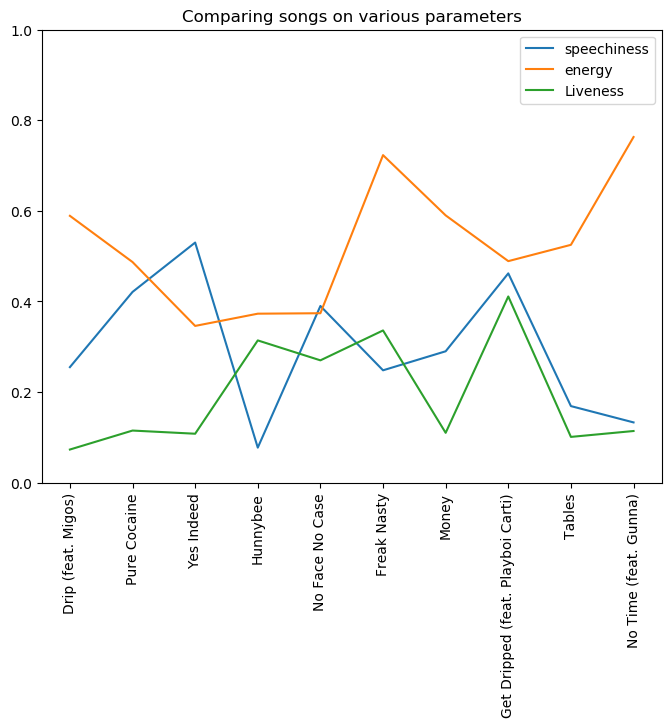

In [57]:
w = 8
h = 6
d = 100
dance_df = df.sort_values(by='danceability', ascending=False)
plt.figure(figsize=(w, h), dpi=d)
x1 = dance_df["track_name"].head(10)
y1 = dance_df["speechiness"].head(10)
plt.plot(x1, y1,label="speechiness")
plt.ylim(0, 1.0)
plt.legend()

x2 = dance_df["track_name"].head(10)
y2 = dance_df["energy"].head(10)
plt.plot(x2, y2,label="energy")
plt.legend()

x3 = dance_df["track_name"].head(10)
y3 = dance_df["liveness"].head(10)
plt.plot(x3, y3,label="Liveness")
plt.legend()
plt.xticks(rotation='vertical')
plt.title("Comparing songs on various parameters")

The above plot shows that their is an opposite relationship between the energy and speechiness. Suggesting that songs with high energy parameter are likely to have a low speechiness or word clarity factor. 

## Section 4.3

### ANALYSIS: Which parameters affect the popularity of the songs on the online music platforms?

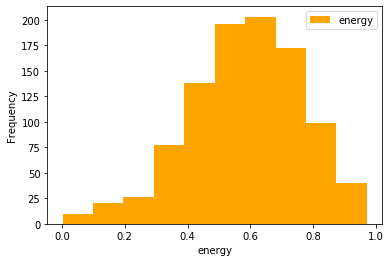

In [58]:
# Visualize distribution of a parameter-energy 
df['energy'].plot(kind='hist', color='orange')
plt.xlabel('energy')
plt.legend()

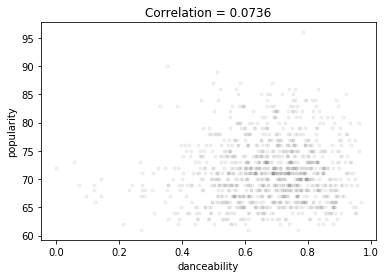

In [59]:
# Visualize relationship between danceability and popularity
plt.plot(df['danceability'], df['popularity'], 'k.', alpha=0.05)
plt.xlabel('danceability')
plt.ylabel('popularity')
plt.title('Correlation = %.4f' % df['danceability'].corr(df['popularity']));

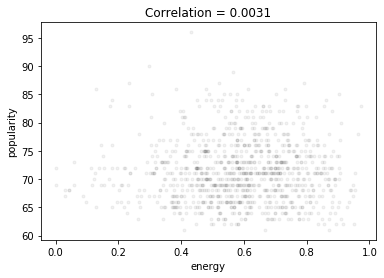

In [60]:
# Visualize relationship between danceability and popularity
plt.plot(df['energy'], df['popularity'], 'k.', alpha=0.05)
plt.xlabel('energy')
plt.ylabel('popularity')
plt.title('Correlation = %.4f' % df['energy'].corr(df['popularity']));

As energy and popularity has the highest correlation with popularity as compared to other parameters. Lets perform linear regression to check and validate the same.

## Section 4.4

### Execution of Linear Regression 

In [61]:
X = df[['energy', 'danceability']]
y = df['popularity']
model = sm.OLS(endog=y, exog=X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             popularity   R-squared (uncentered):                   0.963
Model:                            OLS   Adj. R-squared (uncentered):              0.963
Method:                 Least Squares   F-statistic:                          1.288e+04
Date:                Sun, 05 Apr 2020   Prob (F-statistic):                        0.00
Time:                        21:12:55   Log-Likelihood:                         -3958.8
No. Observations:                 981   AIC:                                      7922.
Df Residuals:                     979   BIC:                                      7931.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
energy          40.2137      2.004     20.064      0.000      36.280      44.147
danceability    67.4752      1.775     38.020      0.000      63.993      70.958
==============================================================================
Omnibus:                      183.195   Durbin-Watson:                   1.730
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              397.956
Skew:                           1.041   Prob(JB):                     3.85e-87
Kurtosis:                       5.325   Cond. No.                         5.47
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0, 0.5, 'Residuals')

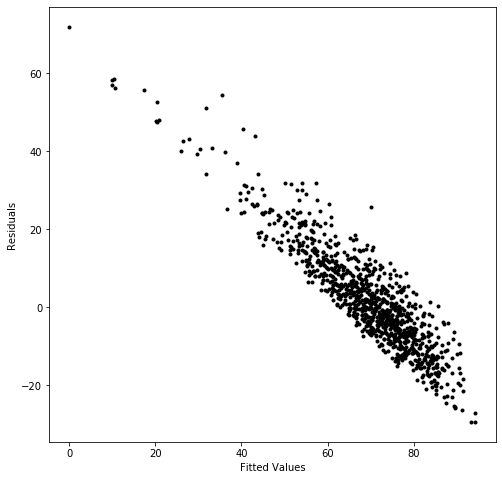

In [62]:
plt.figure(figsize=(8,8))
plt.plot(model.fittedvalues, model.resid, 'k.')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')

From the above analysis, it shows that higher values of energy and danceability parameters of the songs result in higher popularity as compared to other tracks. In the above regression analysis, the R-square is extremely high, which ensures that the model fits well.
The residuals v/s fitted values graph is also more linear now. This shows that the variance between the errors and fitted values has reduced. Furthermore, the heteroscedasticity has reduced too. Hence, our regression model is suitable.

## Section 4.5

### ANALYSIS  : Among the top-5 artists from 2018 which artist has the highest increase in popularity in 2019 as compared to 2018?

In [63]:
df_top = df.sort_values('popularity', ascending=False).head(100)
df_top.head()

,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Trevor Daniel,Falling,4TnjEaWOeW0eKTKIEvJyCa,96,0.784,0.430,10,-8.756,0,0.0364,0.123,0.00000,0.0887,0.2360,127.087,159382,4
3,Billie Eilish,lovely (with Khalid),0u2P5u6lvoDfwTYjAADbn4,90,0.351,0.296,4,-10.109,0,0.0333,0.934,0.00000,0.0950,0.1200,115.284,200186,4
1,Juice WRLD,Lucid Dreams,285pBltuF7vW8TeWk8hdRR,89,0.511,0.566,6,-7.230,0,0.2000,0.349,0.00000,0.3400,0.2180,83.903,239836,4
11,Post Malone,rockstar (feat. 21 Savage),0e7ipj03S05BNilyu5bRzt,87,0.585,0.520,5,-6.136,0,0.0712,0.124,0.00007,0.1310,0.1290,159.801,218147,4
27,Kina,Get You The Moon (feat. Snøw),4ZLzoOkj0MPWrTLvooIuaa,87,0.498,0.235,1,-16.541,0,0.1880,0.720,0.00000,0.1440,0.0895,118.917,179080,4


In [64]:
pop_18_songs = df_top[['artist_name','track_name']].groupby('artist_name').count().rename(columns={'track_name':'no_of_songs'}).sort_values('no_of_songs', ascending=False)

In [65]:
pop_18_songs.head()

,no_of_songs
artist_name,
Post Malone,5
XXXTENTACION,5
Juice WRLD,5
Drake,4
Bazzi,2


In [66]:
pop_18 = df_top[['artist_name','popularity']].groupby('artist_name').sum().sort_values('popularity', ascending=False)

In [67]:
df_top1 = df1.sort_values('popularity', ascending=False).head(100)

In [68]:
pop_19_songs = df_top1[['artist_name','track_name']].groupby('artist_name').count().rename(columns= {'track_name':'no_of_songs'}).sort_values('no_of_songs', ascending=False)

In [69]:
pop_19 = df_top1[['artist_name','popularity']].groupby('artist_name').sum().sort_values('popularity', ascending=False)

In [70]:
df_top2 = df2.sort_values('popularity', ascending=False).head(100)

In [71]:
pop_17_songs = df_top2[['artist_name','track_name']].groupby('artist_name').count().rename(columns={'track_name':'no_of_songs'}).sort_values('no_of_songs', ascending=False)

In [72]:
pop_17 = df_top2[['artist_name','popularity']].groupby('artist_name').sum().sort_values('popularity', ascending=False)

In [73]:
pop_18 = pop_18.reset_index()

In [74]:
pop_19 = pop_19.reset_index()

In [75]:
pop_19.head()

,artist_name,popularity
0,Billie Eilish,530
1,Post Malone,351
2,Harry Styles,346
3,Lewis Capaldi,268
4,DaBaby,259


In [76]:
x={}
new_list = ['Post Malone','XXXTENTACION','Travis Scott','Drake']
for u in range(len((new_list))):
    y=0
#appending the popularity of artists for the year 2019 in the dictionary
    for i in range(len((pop_19))):
        if(pop_19['artist_name'][i] == new_list[u]):
            print(pop_19['artist_name'][i])
            y=pop_19['popularity'][i]
            x.update({pop_19['artist_name'][i]:y})

Post Malone
Travis Scott
Drake


In [77]:
x

{'Post Malone': 351, 'Travis Scott': 89, 'Drake': 86}

In [78]:
change_pre = np.array(list(x.values()))

In [79]:
change_pre

array([351,  89,  86], dtype=int64)

In [80]:
change_pre_post = pop_18['popularity'].head().to_numpy()

In [81]:
np_del = [1,4]
some_var = np.delete(change_pre_post,np_del)
some_var

array([420, 419, 327], dtype=int64)

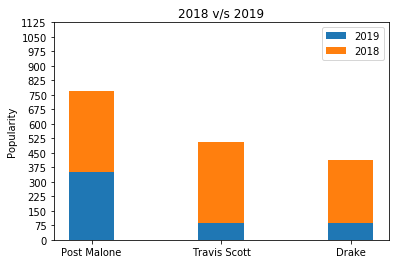

In [82]:
N = 3
ind = np.arange(N)
width = 0.35

p1 = plt.bar(ind, change_pre, width)#, yerr=menStd)
p2 = plt.bar(ind, some_var, width, bottom=change_pre)#, yerr=womenStd)

plt.ylabel('Popularity')
plt.title('2018 v/s 2019')
plt.xticks(ind, ['Post Malone', 'Travis Scott', 'Drake'])
plt.yticks(np.arange(0, 1200, 75))
plt.legend((p1[0], p2[0]), ('2019', '2018'))

plt.show()

From the above graph we can conclude that "Post Malone" has the highest increase in the popularity in the between the years 2018 and 2019.

In [83]:
change_in_pop = change_pre - some_var

In [84]:
change_in_pop

array([ -69, -330, -241], dtype=int64)

## Section 4.6

### ANALYSIS: The distribution of the spotify audience by countries.

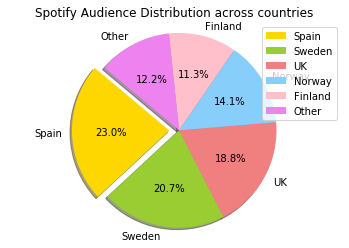

In [85]:
import matplotlib.pyplot as plt

# Data to plot
labels = 'Spain', 'Sweden', 'UK', 'Norway',"Finland","Other"
sizes = [245, 220, 200, 150, 120, 130]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue',"Pink","Violet"]
explode = (0.1, 0, 0, 0,0,0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Spotify Audience Distribution across countries')
plt.legend()
plt.axis('equal')
plt.show()

## Section 4.7

### ANALYSIS: The top 5 danceable tracks for the year 2018 VS 2019

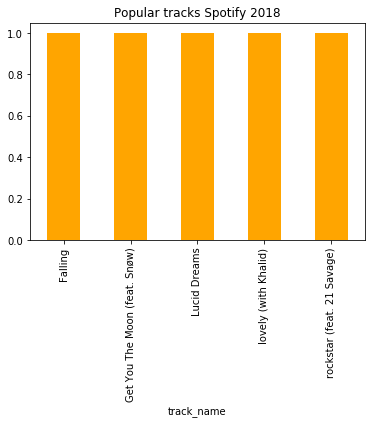

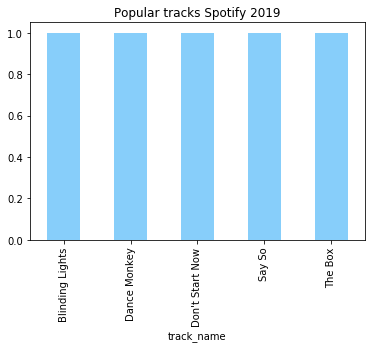

In [86]:
#Top 5 danceable tracks for the year 2018 VS 2019

df.head(5).groupby('track_name')['danceability'].nunique().plot(kind='bar', color='orange')
plt.title('Popular tracks Spotify 2018')
plt.show()

df1.head(5).groupby('track_name')['danceability'].nunique().plot(kind='bar', color='lightskyblue')
plt.title('Popular tracks Spotify 2019')
plt.show()

## Section 4.8

### ANALYSIS : Comparing the platforms. Which are the top 5 artists for Spotify VS Deezer platforms?

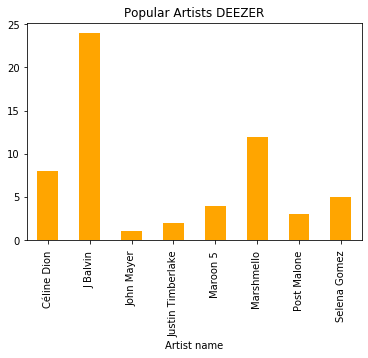

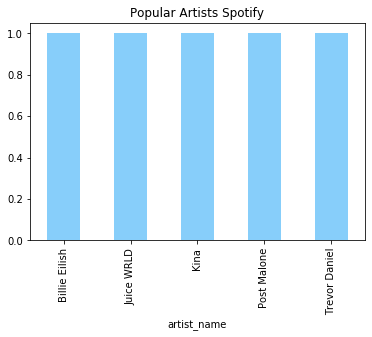

In [87]:
R2=R1.groupby('Artist name')['fans'].nunique().plot(kind='bar', color='orange')
plt.title('Popular Artists DEEZER')
plt.show()

df_top.head().groupby('artist_name')['popularity'].nunique().plot(kind='bar', color='lightskyblue')
plt.title('Popular Artists Spotify')
plt.show()

# Section 5

## Conclusions drawn and Visualisations explained

### The following are the conclusions that can be drawn by analysing the above exhibits :

1) From the exhibit 4.1, we can conclude by saying that the artist Post Malone's back to back albums Hollywood's Bleeding and Circles respectively, dominated the Spotify platform with the most popularity.  

2) From the exhibit 4.2, we can conclude by saying that their is an inversely proportional relationship between the energy and speechiness. Having said that 'Speechiness' can be defined as the detection of presence of spoken words in a single track whereas 'Energy' is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. All this have been taken account according to the definations defined by the Spotify Developers website. Suggesting that songs with high energy parameter are likely to have a low speechiness or word clarity factor.
    
    

3) From the exhibit 4.3, we can conclude by saying that the 'energy' & 'danceability' have the highest correlation with the 'popularity' of a particular song as compared to other parameters of a track. Initially various other parameters were taken into account by keeping alpha value ranging from 0.05 & 0.1 but the most correlation factor with 'popularity' was observed with 'energy' and 'danceability'.

4) From the exhibit 4.4, analysis, it shows that higher values of energy and danceability parameters of the songs result in higher popularity as compared to other tracks. In the regression analysis, the R-square and the adjusted R square values are extremely high. The residual plot is more linear and hence the problem of heteroscedaticity does not exist and the same has been validated by our analysis. The residuals and fitted values graph is more linear now. Which shows that the variance between the errors and fitted values is reduced. Also the heteroscedasticity is reduced. Hence our regression model is suitable.

5) From the exhibit 4.5, analysis, it shows that the artish Post Malone has gained the most popularity in the year 2019.

6) From the exhibit 4.6, analysis, it shows that Spain and Sweden contribute most to the overall subscribers of Spotify.

7) From the exhibit 4.7, we can conclude that 'Falling' and 'Circles' were the most popular tracks of 2018 and 2019 respectively.

8) From the exhibit 4.8, we can observe from the cpmparitive study that the most popular artist differs with respect to the mobile platform. Celine Dion is the most popular on Deezer where as Billie Eilish is the most popular on spotify overall. Only the artist Marshmello was common in the Top 5 list of both the platforms.